In [165]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt


# Prueba Tecnica

Carga de datos 

In [42]:
df = pd.read_csv("Data/Invistico_Airline.csv")

Primer analisis

In [48]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Consultar sobre data faltante

In [47]:
bool_series = pd.isnull(df)
bool_series.sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Para imputar datos

In [45]:
# PARA LLENAR CON CEROS
#df = df.fillna(0)


#PARA LLENAR CON EL VALOR DE LA MEDIA
media = df["Arrival Delay in Minutes"].mean(skipna=True)
media
df = df.fillna(media)


Para crear una nueva estructura a partir de la data original

In [56]:
Business  = pd.DataFrame({"Business travel":df["Type of Travel"],"Sexo":df["Gender"]})

In [61]:

df.loc[df['Age']<18, 'Rango_edad'] ='Menor'
df.loc[df['Age'].between(18,59), 'Rango_edad'] ='Adulto'
df.loc[df['Age']>59, 'Rango_edad'] ='Anciano'


#usando numpy
#df["r2"] = np.where(df["Age"]<18, "Menor", np.where(df["Age"]<60,"adulto","anciano"))

#usando funciones
#def rangoIdentifier(edad):
#    if edad in edadMenor : return "Menor"
#    if edad in edadAdulto : return "Adulto"
#    if edad in edadAnciano : return "Anciano"


In [63]:
Business["Rango_edad"] = df["Rango_edad"]
Business.drop

,Business travel,Sexo,Rango_edad
0,Personal Travel,Female,Anciano
1,Personal Travel,Male,Adulto
2,Personal Travel,Female,Menor
3,Personal Travel,Female,Anciano
4,Personal Travel,Female,Anciano
...,...,...,...
129875,Personal Travel,Female,Adulto
129876,Personal Travel,Male,Anciano
129877,Personal Travel,Male,Anciano
129878,Personal Travel,Male,Anciano


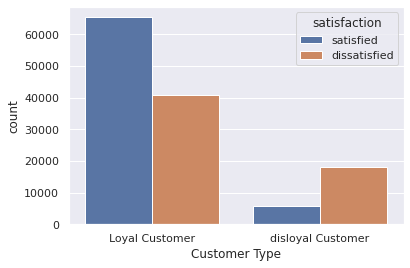

In [95]:
g2 = sns.countplot(data=Business, x= df["Customer Type"], hue=df["satisfaction"])

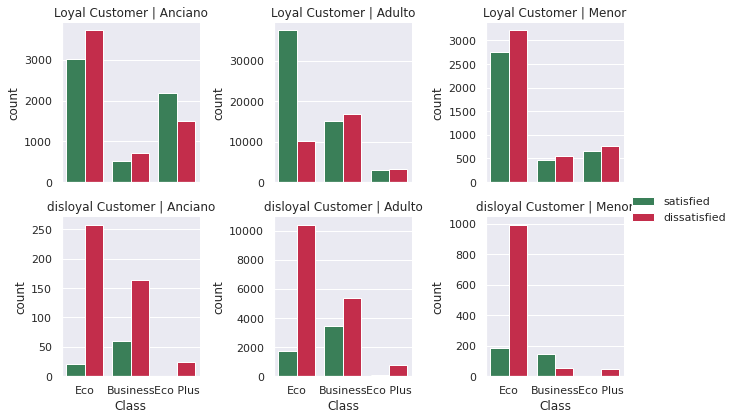

In [164]:

pal = dict(satisfied="seagreen", dissatisfied="crimson")
g = sns.FacetGrid(df,col="Rango_edad", sharey=False, row="Customer Type")
g.map_dataframe(sns.countplot,x="Class", hue="satisfaction",palette=pal).add_legend()
g.set_titles(col_template="{col_name}",row_template="{row_name}")



In [166]:
plt.savefig("6x6.svg")

<Figure size 432x288 with 0 Axes>

[Text(0.5, 1.0, 'Adulto mayor')]

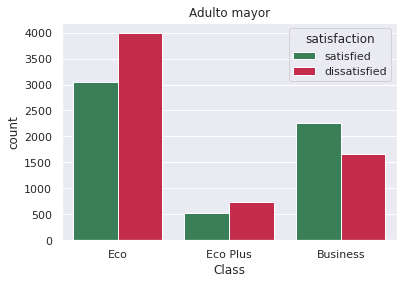

In [138]:
nd = df[df.Rango_edad == 'Anciano']
sns.countplot(data=nd, x="Class", hue="satisfaction",palette=pal).set(title='Adulto mayor')


[Text(0.5, 1.0, 'Adulto')]

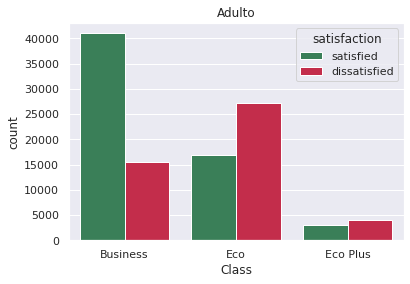

In [140]:
nd2 = df[df.Rango_edad == 'Adulto']
sns.countplot(data=nd2, x="Class", hue="satisfaction",palette=pal).set(title='Adulto')

[Text(0.5, 1.0, 'Menor de edad')]

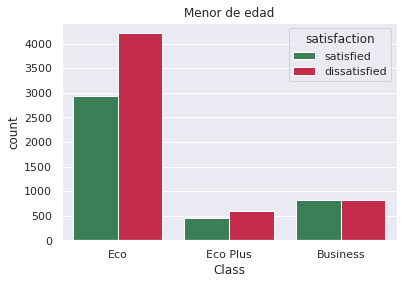

In [151]:

nd3 = df[df.Rango_edad == 'Menor']
sns.countplot(data=nd3, x="Class", hue="satisfaction",palette=pal).set(title='Menor de edad')


<AxesSubplot:>

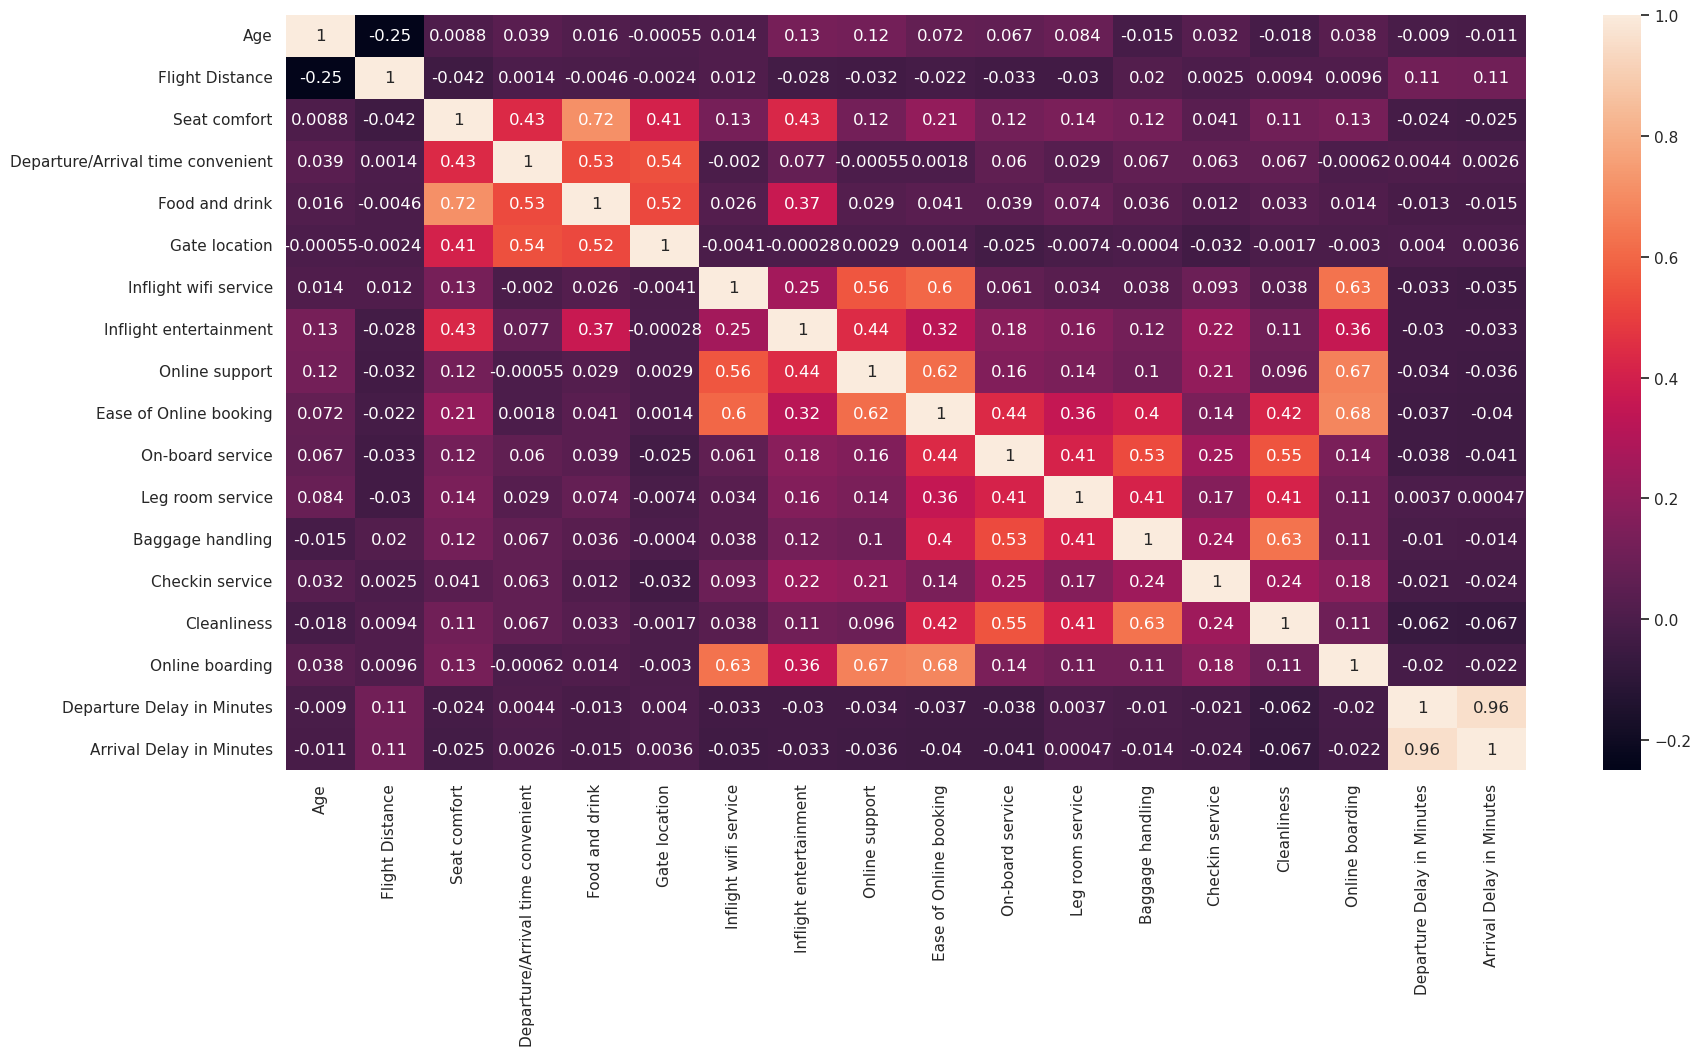

In [257]:
fig = plt.figure(figsize = (20,10), dpi = 100)
ax = fig.gca()
sns.heatmap(df.corr('pearson'), annot = True)

In [189]:
df_bool = ((df.satisfaction == 'satisfied') & (df.Rango_edad =='Adulto') & (df.Class == 'Business')).sum()
porcentaje = (df_bool/df.shape[0])*100
porcentaje

31.583769633507853

In [212]:
df.query("satisfaction == 'satisfied' & Class == 'Business' & Rango_edad == 'Adulto'").shape[0]/df.shape[0]

0.3158376963350785

In [202]:
df.filter(axis = 1, like='satisfied')

71087

Problemas estadisticas

In [221]:
import scipy.stats as ss

In [225]:
ss.norm.cdf(120,120,10)

0.5

In [226]:
ss.norm.cdf(125,120,10) - ss.norm.cdf(120,120,10)

0.19146246127401312

In [229]:
1 - ss.norm.cdf(130,120,10)

0.15865525393145707

In [251]:
ss.norm.cdf(310,300,25)

0.6554217416103242

In [265]:
ss.norm.cdf(341.1213406737868,300,25)

0.9499999999999998

In [255]:
ss.norm.ppf(0.95,300,25)

341.1213406737868

### Siguiendo la practica
Vamos a verificar si se puede entregar el jupyter Notebook

In [278]:
import numpy as np

weights = np.array([0.3,0.2,0.5])
kanto = np.array([73,67,43])

tot = np.dot(kanto,weights)
tot.sum()



56.8

In [279]:
import statsmodels.api as sm

In [280]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [281]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [282]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.108e+06
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          9.97e-240
Time:                        13:39:37   Log-Likelihood:                -145.48
No. Observations:                 100   AIC:                             297.0
Df Residuals:                      97   BIC:                             304.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4634      0.310      4.728      0.0

In [283]:
data_url = "https://raw.githubusercontent.com/nguyen-toan/ISLR/07fd968ea484b5f6febc7b392a28eb64329a4945/dataset/Advertising.csv"
tsdt = pd.read_csv(data_url).drop('Unnamed: 0', axis=1)
tsdt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [285]:
import statsmodels.formula.api as smf

# Fitting linear model
res = smf.ols(formula= "Sales ~ TV + Radio + Newspaper", data=tsdt).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        13:54:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
# base code
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [288]:
cls = Linear_Reg_Diagnostic(res)


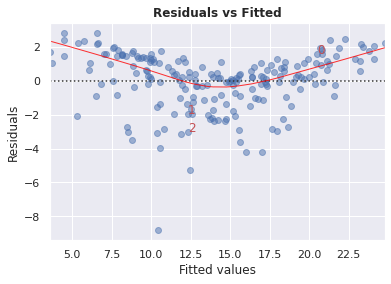

In [289]:
cls.residual_plot();

/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


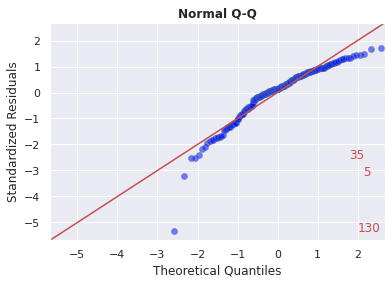

In [290]:
cls.qq_plot();

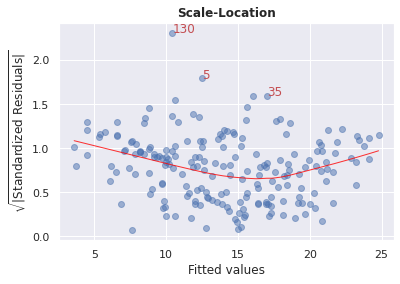

In [291]:
cls.scale_location_plot();

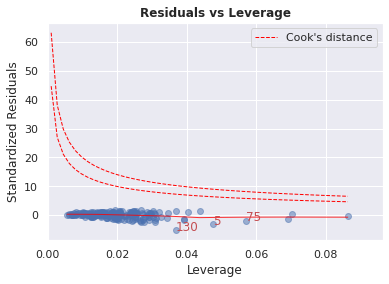

In [292]:
cls.leverage_plot();

In [293]:
cls.vif_table()

    Features  VIF Factor
1         TV        1.00
2      Radio        1.14
3  Newspaper        1.15
0  Intercept        6.85


/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


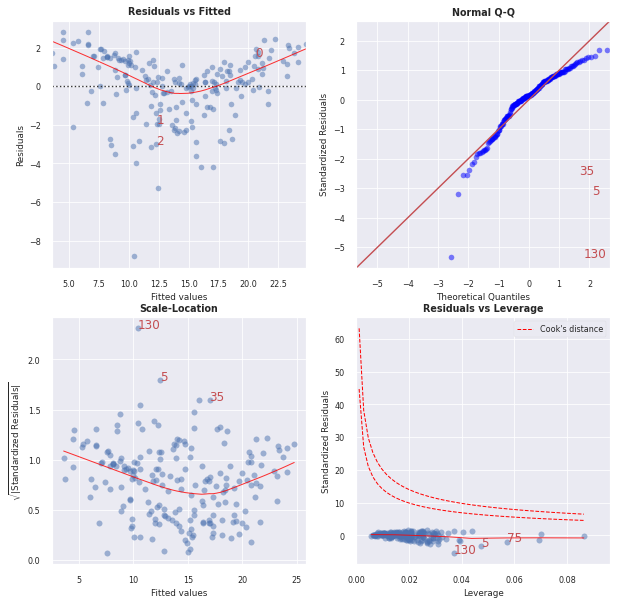

    Features  VIF Factor
1         TV        1.00
2      Radio        1.14
3  Newspaper        1.15
0  Intercept        6.85


In [294]:
cls = Linear_Reg_Diagnostic(res)
fig, ax = cls()

## Categorias de data Science
hay 4 categorias principales

### planning 
1. define goals
2. organize resources
3. coordinate people
4. schedule project

### data preparation
5. get data
6. clean data 
7. explore data 
8. refine data 

### modelacion estadistica
9. crear el modelo (podria ser una regresion )
10. validar el modelo
11. Evaluar el modelo
12. Refinar el modelo

### Follow up / seguimiento
13. presentar el modelo
14. Desplegar el modelo
15. Revisitar el modelo 
16. archive assets (documentar lo que tenemos y hacer posible para que se le pueda dar seguimiento a todo en el futuro)

#### reglas o roles
Data: 
Engineer - back end hardware, software.  DNS, develp y DBA
Big data - focus on computer science & math, machine learning, data products
Researcher - focus on domain specific reserach, have strong statistics
Analys